In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


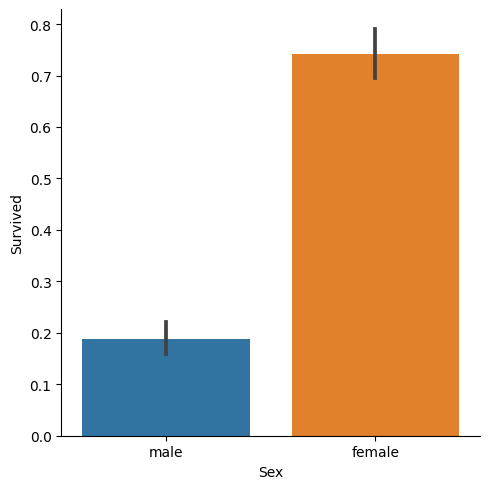

In [6]:
sns.catplot( x="Sex", y="Survived", data=df, kind="bar")

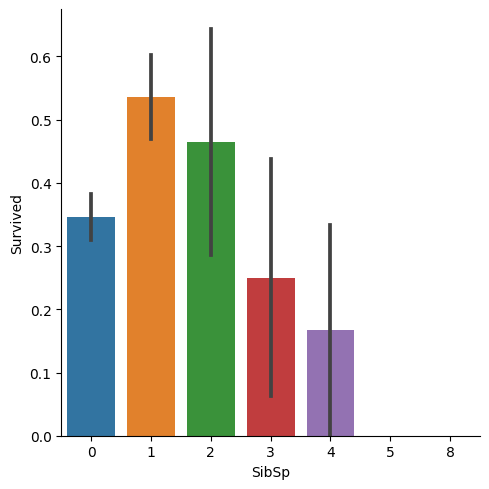

In [7]:
sns.catplot( x="SibSp", y="Survived", data=df, kind="bar")

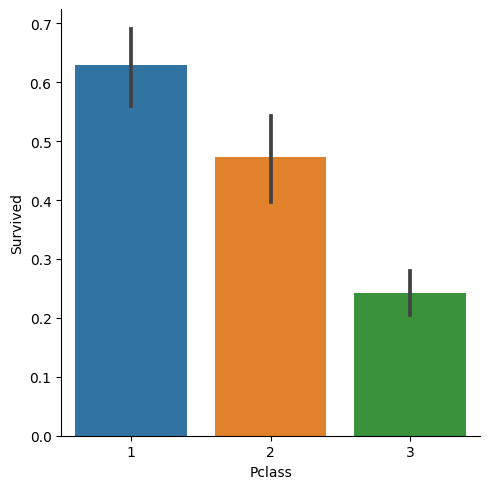

In [8]:
sns.catplot( x="Pclass", y="Survived", data=df, kind="bar")

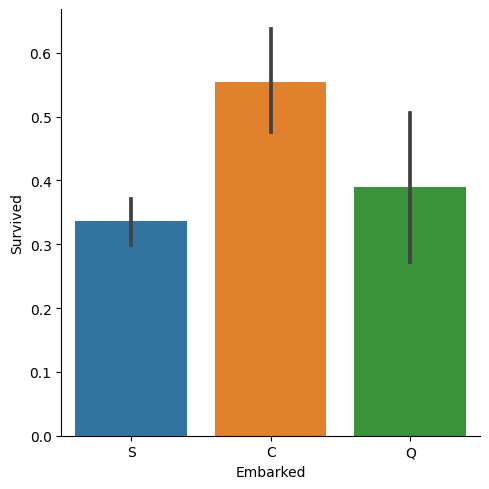

In [9]:
sns.catplot( x="Embarked", y="Survived", data=df, kind="bar")

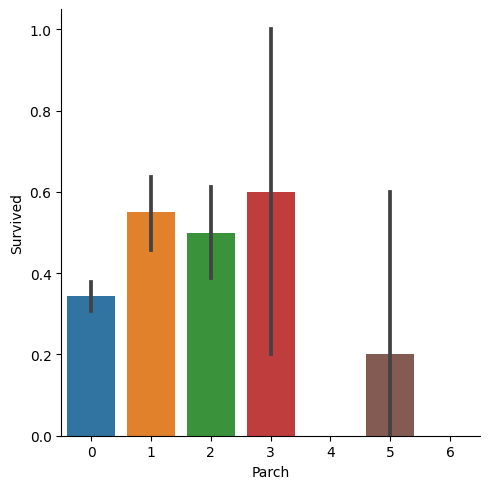

In [10]:
sns.catplot( x="Parch", y="Survived", data=df, kind="bar")

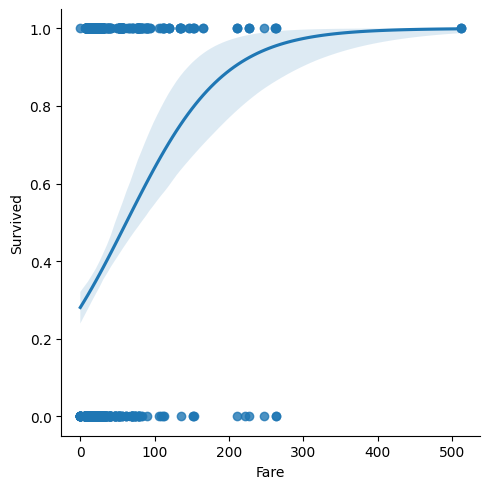

In [11]:
sns.lmplot(x="Fare", y="Survived", data=df, logistic=True)

In [12]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [13]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [14]:
features_list = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
x = df[features_list]
y = df["Survived"]


In [15]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0,
                                                    stratify=y)

In [17]:
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Inconnu")
x_train.iloc[:,[6]] = categorical_imputer.fit_transform(x_train.iloc[:,[6]])
x_test.iloc[:,[6]] = categorical_imputer.transform(x_test.iloc[:,[6]])


In [18]:
numerical_imputer = SimpleImputer(strategy="median")
x_train.iloc[:,[2]] = numerical_imputer.fit_transform(x_train.iloc[:,[2]])
x_test.iloc[:,[2]] = numerical_imputer.transform(x_test.iloc[:,[2]])


In [19]:
x_train.isnull().any()


Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [20]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
502,3,female,28.0,0,0,7.6292,Q
464,3,male,28.0,0,0,8.0500,S
198,3,female,28.0,0,0,7.7500,Q
765,1,female,51.0,1,0,77.9583,S
421,3,male,21.0,0,0,7.7333,Q


In [21]:
numeric_features = [0, 2, 3, 4, 5] 
numeric_transformer = StandardScaler()

categorical_features = [ 1, 6] 
categorical_transformer = OneHotEncoder()


feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

x_train = feature_encoder.fit_transform(x_train)
(x_train[0:5,:])

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.8342464 , -0.09099558, -0.48693486, -0.46765914,
        -0.48206053],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.8342464 , -0.09099558, -0.48693486, -0.46765914,
        -0.47408512],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.8342464 , -0.09099558, -0.48693486, -0.46765914,
        -0.47977101],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -1.56084809,  1.70021457,  0.45774531, -0.46765914,
         0.85088482],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.8342464 , -0.63614649, -0.48693486, -0.46765914,
        -0.48008752]])

In [22]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [23]:
x_test = feature_encoder.transform(x_test)
print(x_test[:5])

[[ 0.          1.          0.          0.          0.          1.
   0.8342464   0.8824882  -0.48693486  2.1035633  -0.35183846]
 [ 0.          1.          0.          0.          0.          1.
   0.8342464   0.29839793 -0.48693486 -0.46765914 -0.44660331]
 [ 1.          0.          0.          0.          0.          1.
   0.8342464   0.76567014  0.45774531  5.96039696 -0.03390238]
 [ 0.          1.          0.          0.          0.          1.
   0.8342464  -0.09099558 -0.48693486 -0.46765914 -0.44660331]
 [ 1.          0.          1.          0.          0.          0.
  -1.56084809 -0.40251038 -0.48693486 -0.46765914  0.94944027]]


In [24]:
y_test_pred = classifier.predict(x_test)
print(y_test_pred)

print("Final accuracy score on Test set: ",classifier.score(x_test, y_test))

[0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
Final accuracy score on Test set:  0.7821229050279329


In [25]:
print("Train score: ", classifier.score(x_train, y_train))
print("Test score: ", classifier.score(x_test, y_test))

Train score:  0.8061797752808989
Test score:  0.7821229050279329


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


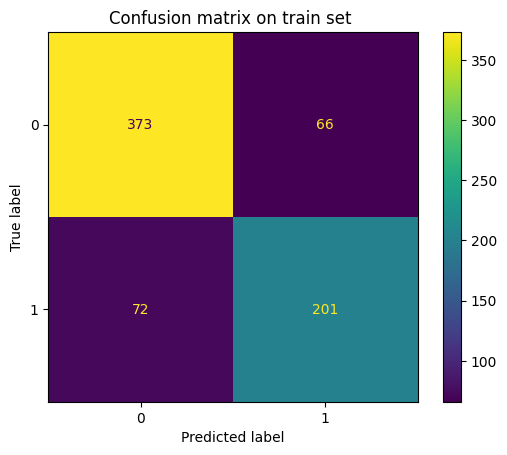

c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy-score on train set :  0.8061797752808989


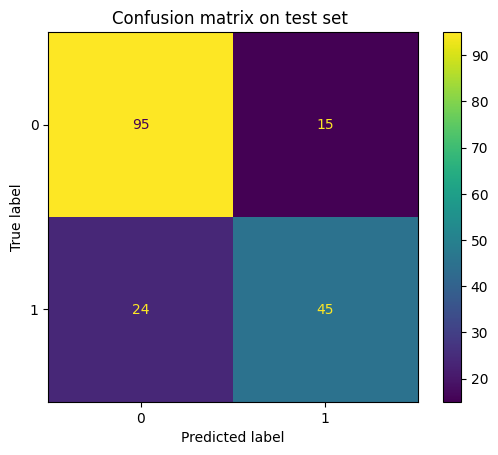

accuracy-score on test set :  0.7821229050279329


In [26]:


# Plot confusion matrix
cm = plot_confusion_matrix(classifier, x_train, y_train)
cm.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(x_train, y_train))


cm = plot_confusion_matrix(classifier, x_test, y_test)
cm.ax_.set_title("Confusion matrix on test set ")
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(x_test, y_test))

In [27]:
# [item for array in categorical_column_names for item in array]

coefficients are:  [[ 1.35435033 -1.3546039   0.00462999  0.18306057  0.03203064 -0.21997476
  -0.93824604 -0.52134891 -0.37695485 -0.04539129  0.14051389]]
Constant is:  [-0.09844046]

All transformers are:  [('cat', OneHotEncoder(), [1, 6]), ('num', StandardScaler(), [0, 2, 3, 4, 5])]

One Hot Encoder transformer is:  OneHotEncoder()

Categorical columns are:  ['female' 'male' 'C' 'Inconnu' 'Q' 'S']

numerical columns are:  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

All column names are:  ['female' 'male' 'C' 'Inconnu' 'Q' 'S' 'Pclass' 'Age' 'SibSp' 'Parch'
 'Fare']



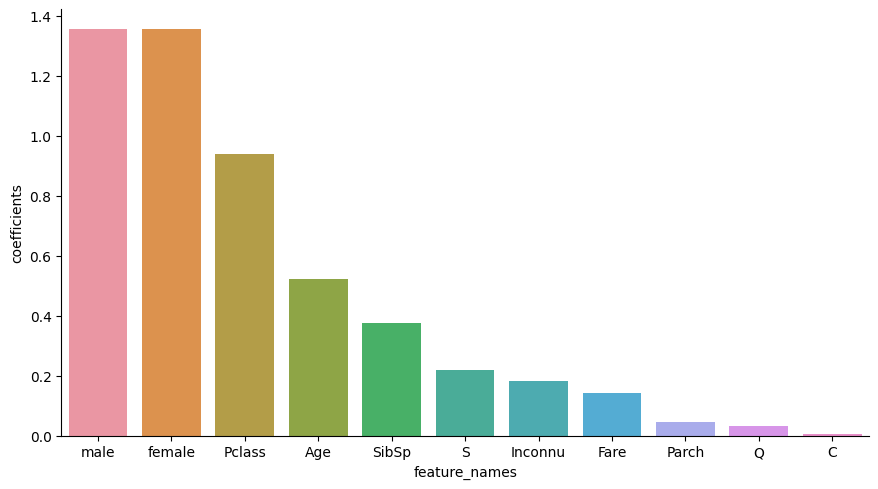

In [28]:
# Check coefficients 

print("coefficients are: ", classifier.coef_) 
print("Constant is: ", classifier.intercept_)
print()

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)
print()

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])
print()

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_

# CAREFUL HERE, we have a list of two arrays. We can use list comprehensions OR np.append() 
# General complex method
# flat_cat_features = [item for array in categorical_column_names for item in array]

# Easy but manual method
flat_cat_features = np.append(categorical_column_names[0], categorical_column_names[1])

print("Categorical columns are: ", flat_cat_features) 
print()

# Print numerical columns
numerical_column_names = x.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)
print()

# Append all columns 
all_column_names = np.append(flat_cat_features, numerical_column_names)
print("All column names are: ",all_column_names)
print()

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                            # Data need to be 1 dimensional
                                            # That's what .squeeze()
})


# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph